In [2]:
%reload_ext autoreload
%autoreload 2
# %matplotlib widget

## Visualize timeseries

In [14]:
%%time

ts0 = ds[10][:, 1, :256, :256].compute()
ts1 = ds10[:, 1, :256, :256].compute()

CPU times: user 1min 29s, sys: 5.46 s, total: 1min 35s
Wall time: 45.4 s


In [15]:
# for some reason ts1 is a numpy array
ts1 = ts0.copy(data=ts1)

In [16]:
import ipywidgets as ipw
import hvplot.xarray # noqa
import hvplot.pandas # noqa
import panel as pn
import pandas as pd
import panel.widgets as pnw
import xarray as xr

ts0.interactive.sel(time=pnw.DiscreteSlider).plot(vmin=0, vmax=2500)


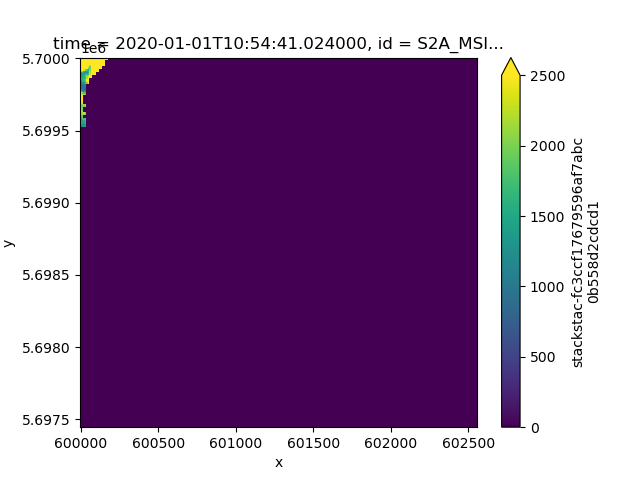

In [18]:
ts1.interactive.sel(time=pnw.DiscreteSlider).plot(vmin=0, vmax=2500)

In [32]:
darr = scl_mask.mask

In [31]:
mask20

,Array,Chunk
Bytes,3.26 GiB,1.00 MiB
Shape,"(116, 5490, 5490)","(1, 1024, 1024)"
Count,1420 Graph Layers,4176 Chunks
Type,bool,numpy.ndarray


In [ ]:
scale=2,
order=0,
chunks=(1, 1024, 1024)):

"""Upscale dask array"""
shape = darr.shape
dtype=darr.dtype
new_shape = shape[0], shape[1] * scale, shape[2] * scale

darr_scaled = da.map_blocks(
    resize_chunk,
    darr,
    kwargs={'scale': 2, 'order': 0},
    template=xr.DataArray(
        da.zeros(new_shape, chunks=chunks, dtype=bool)))

In [45]:
x = ds[20].x.values
y = ds[20].y.values
time = ds[20].time.values

scl20_da = xr.DataArray(scl_mask.mask, 
                         dims=('time', 'y', 'x'),
                         coords={'time': time, 'y': y, 'x': x},
                         name='SCL 10m')

In [51]:
import numpy as np

In [54]:
mask_10 = scl20_da.astype(np.uint8)

In [56]:
mask_10 = mask_10.interp(x=ds[10].x, y=ds[10].y, method="nearest")

In [57]:
scl20_da

,Array,Chunk
Bytes,3.26 GiB,1.00 MiB
Shape,"(116, 5490, 5490)","(1, 1024, 1024)"
Count,1420 Graph Layers,4176 Chunks
Type,bool,numpy.ndarray


In [67]:
resized_scl

,Array,Chunk
Bytes,104.20 GiB,8.00 MiB
Shape,"(116, 10980, 10980)","(1, 1024, 1024)"
Count,1422 Graph Layers,14036 Chunks
Type,float64,numpy.ndarray


In [20]:
ds10_masked = da.where(



,Array,Chunk
Bytes,182.34 GiB,8.00 MiB
Shape,"(116, 7, 5490, 5490)","(1, 1, 1024, 1024)"
Count,1427 Graph Layers,29232 Chunks
Type,float64,numpy.ndarray
